
# Ozone Levels Time Series Analysis

This project focuses on **time series decomposition** of ozone levels data.  
We aim to:

- Identify **long-term trends**
- Detect **seasonal variations**
- Analyze **random fluctuations (residuals)**
- Prepare for potential forecasting and environmental insights


In [4]:
import pandas as pd

ozone_data = pd.read_csv(r"C:\Users\use\Documents\ozone_data.csv")
print(ozone_data.columns)


Index(['date', 'year', 'month', 'day', 'day_of_year', 'season', 'decade',
       'ozone_hole_area', 'ozone_column_minimum', 'ozone_mass_deficit',
       'air_temperature', 'surface_pressure', 'wind_speed',
       'stratosphere_temperature'],
      dtype='object')


In [5]:
import pandas as pd

# 1️⃣ Load the CSV with the correct datetime column
ozone_data = pd.read_csv(
    r"C:\Users\use\Documents\ozone_data.csv",
    parse_dates=['date'],   # lowercase 'date' column
    index_col='date'
)

# 2️⃣ Select the variable of interest
ozone_series = ozone_data['ozone_hole_area']

# 3️⃣ Quick check
ozone_series.head()



date
01/01/1980    0.0
02/01/1980    0.0
03/01/1980    0.0
04/01/1980    0.0
05/01/1980    0.0
Name: ozone_hole_area, dtype: float64

## Visualize Raw Ozone Hole Area Time Series


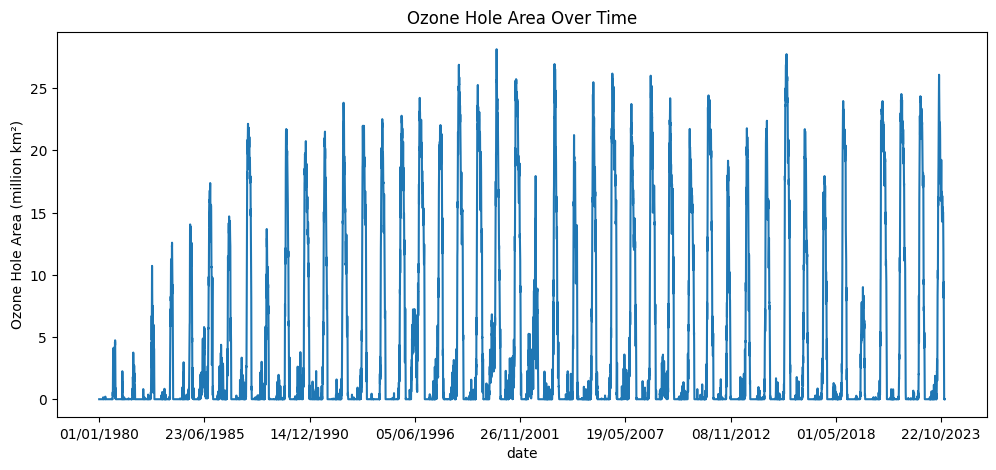

In [6]:
import matplotlib.pyplot as plt

ozone_series.plot(title='Ozone Hole Area Over Time', figsize=(12,5))
plt.ylabel('Ozone Hole Area (million km²)')
plt.show()


## Trend and Seasonal Components (From the Plot)

- **Trend:** Peak magnitudes increase from the early 1980s into the 1990s/2000s and then level off or show a modest decline; this long‑term change appears as changes in the *amplitude* of the annual spikes (higher peaks in earlier decades).

- **Seasonality:** A very strong annual cycle with one sharp spike each Southern Hemisphere spring (Sep–Nov); the remainder of the year the ozone‑hole area is near **0**, so the seasonal signal is concentrated in a short window with peak amplitudes around **15–28 million km²**.

- **Irregular (residual) component:** The irregular component captures the non-repeating, short-term fluctuations that remain after removing trend and seasonality. In this dataset these are the year-specific anomalies (unusually large or small spikes) and short-term meteorological noise; inspecting residuals helps identify outliers and assess whether robust methods or transformations are needed.

***Aplly log transformation***

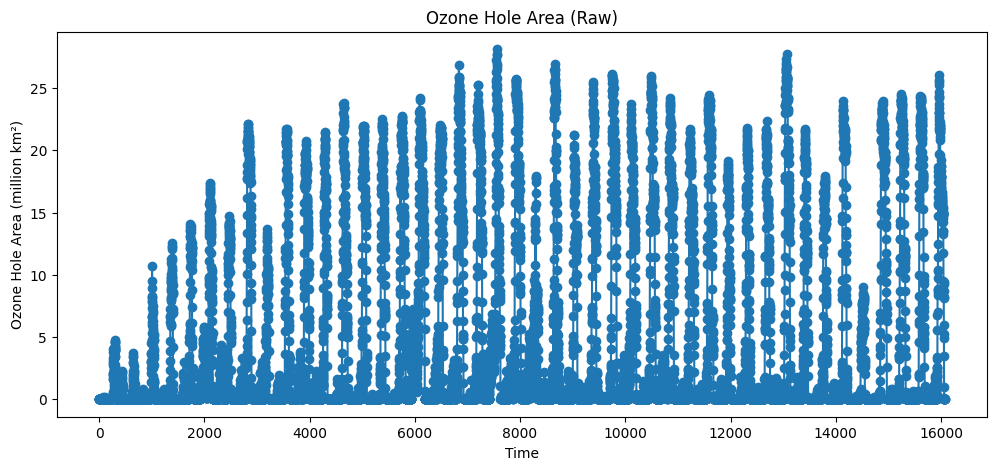

C:\Users\use\AppData\Local\Temp\ipykernel_14624\3020450366.py:14: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(ozone_series.values), marker='o')


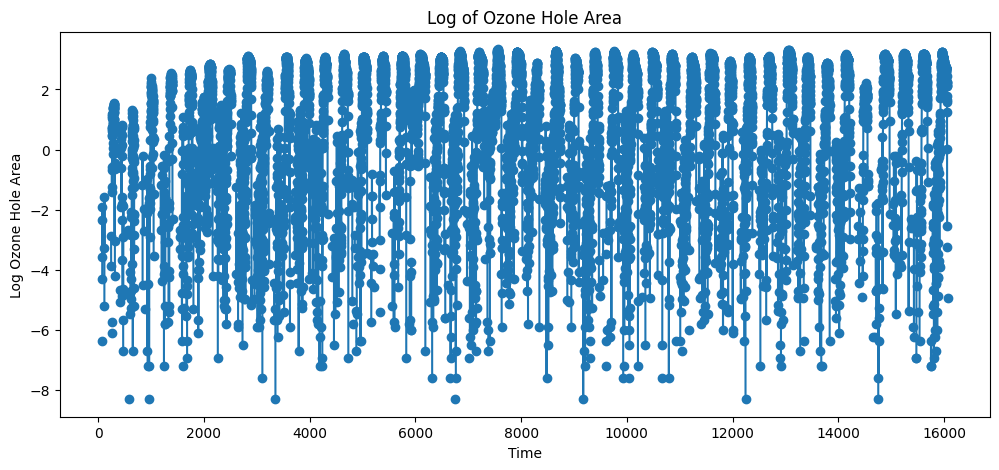

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Plot raw series
plt.figure(figsize=(12,5))
plt.plot(ozone_series.values, marker='o')
plt.title('Ozone Hole Area (Raw)')
plt.xlabel('Time')
plt.ylabel('Ozone Hole Area (million km²)')
plt.show()

# Plot log-transformed series
plt.figure(figsize=(12,5))
plt.plot(np.log(ozone_series.values), marker='o')
plt.title('Log of Ozone Hole Area')
plt.xlabel('Time')
plt.ylabel('Log Ozone Hole Area')
plt.show()



## Variance Analysis and Model Choice

### Visual Evidence from the Raw Series

The raw ozone hole area time series shows **strong seasonality with peaks whose absolute size increases as the overall level increases**. In periods where the ozone hole area is large, the seasonal swings are also much larger, while in low-level periods the fluctuations are comparatively small.

This pattern indicates **non-constant variance**, where variability scales with the magnitude of the series rather than remaining stable over time. Such behavior violates the assumptions of an additive decomposition model, which requires the variance of the seasonal and irregular components to be approximately constant.

### Effect of Log Transformation

After applying a logarithmic transformation, the time series exhibits **more uniform variability across time**. Seasonal oscillations appear more evenly scaled, and extreme peaks in the raw series are compressed. This variance stabilization suggests that the underlying seasonal effect acts **proportionally** to the level of the series rather than additively.

The improvement in variance homogeneity after the log transformation provides strong empirical evidence that the original data follow a **multiplicative structure**.

### Additive vs. Multiplicative Interpretation

An additive model assumes:
\[
Y_t = T_t + S_t + E_t
\]
which is appropriate only when seasonal fluctuations are independent of the series level.

A multiplicative model assumes:
\[
Y_t = T_t \times S_t \times E_t
\]
which allows seasonal effects to scale with the magnitude of the time series.

Given the observed increase in seasonal amplitude with higher ozone hole area values and the variance stabilization achieved via log transformation, the multiplicative model is more suitable for this dataset.

### Conclusion

Based on visual variance analysis of the raw series and the stabilizing effect observed in the log-transformed series, a **multiplicative seasonal decomposition** is justified for the ozone hole area time series. This structure more accurately captures the proportional relationship between seasonal fluctuations and the underlying level of the series.


### Quantitative Check: Variance–Level Relationship

Beyond visual inspection, we formally assess whether variability scales with the level of the ozone hole area series. If variance increases with the mean, this supports a multiplicative structure.

Two complementary diagnostics are used:
- **Coefficient of Variation (CV)**: measures relative variability
- **Rolling Variance vs. Rolling Mean**: assesses whether variance grows with level over time

---

### Coefficient of Variation

The coefficient of variation is defined as:
\[
CV = \frac{\sigma}{\mu}
\]

For additive processes, variability is absolute and CV typically changes with the mean.  
For multiplicative processes, variability is proportional, and CV remains relatively stable.

In [9]:
# Coefficient of variation
cv = ozone_series.std() / ozone_series.mean()
cv


np.float64(1.7703073552466475)

### Interpretation of the Coefficient of Variation

The computed coefficient of variation for the ozone hole area series is:

\[
CV = 1.77
\]

A coefficient of variation greater than 1 indicates that the **standard deviation exceeds the mean**, implying very high relative variability in the data. This level of dispersion is inconsistent with an additive error structure, which assumes constant absolute variance over time.

Instead, such a high CV suggests that variability is **proportional to the magnitude of the series**, meaning that periods with larger ozone hole areas also exhibit substantially larger fluctuations.

### Implication for Model Choice

The large coefficient of variation, combined with:
- increasing seasonal amplitude in the raw series, and
- variance stabilization after log transformation,

provides quantitative evidence in favor of a **multiplicative model** for the ozone hole area time series.

Consequently, a multiplicative seasonal decomposition (or equivalently, an additive decomposition applied to the log-transformed series) is the most appropriate modeling choice.


### Rolling Variance vs. Rolling Mean

To examine how variance behaves as the level of the series changes over time, we compute rolling statistics. If rolling variance increases with the rolling mean, this indicates heteroscedasticity and supports a multiplicative model.


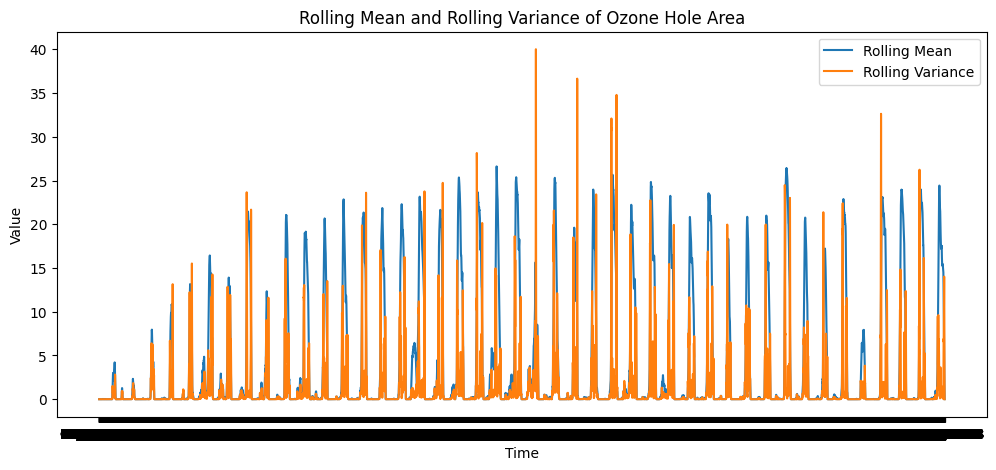

In [10]:
window = 12  # monthly seasonality

rolling_mean = ozone_series.rolling(window).mean()
rolling_var = ozone_series.rolling(window).var()

plt.figure(figsize=(12,5))
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_var, label='Rolling Variance')
plt.title('Rolling Mean and Rolling Variance of Ozone Hole Area')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


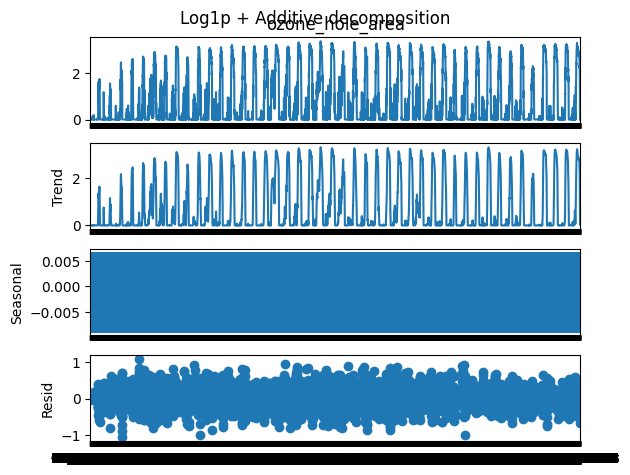

In [12]:
oz_log = np.log1p(ozone_series)
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(oz_log, model='additive', period=12)
res.plot(); plt.suptitle('Log1p + Additive decomposition'); plt.show()